<a href="https://colab.research.google.com/github/Akashkumarashu/data-science-project/blob/main/BOOK_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
df=pd.read_csv("BL-Flickr-Images-Book.csv")


In [ ]:
df

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
df["Date of Publication"].replace(np.NaN,"1800",inplace=True)

In [ ]:
df["Date of Publication"].isnull().sum()

0

In [ ]:
year_publication=df["Date of Publication"].str.extract(r"^(\d{4})",expand=False)

In [ ]:
df["Date of Publication"]=pd.to_numeric(year_publication,downcast="float")

In [ ]:
df.head(10)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,"Fourth edition, revised, etc.",London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
6,519,NaN,London,1872.0,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.","ASHLEY, Florence Emily.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12637.e.3.
7,667,NaN,"pp. 40. G. Bryan & Co: Oxford, 1898",1800.0,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.","ANDREWS, J. - Writer of Verse",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 011652.g.73.
8,874,NaN,London],1676.0,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,"ADAMS, Mary.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11645.bb.42.
9,1143,NaN,London,1679.0,NaN,A Satyr against Vertue. (A poem: supposed to b...,"A., T.","OLDHAM, John.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11602.ee.10.(2.)


In [ ]:
df.drop(index=[0], axis=0, inplace=True)

In [ ]:
df

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
1,216,NaN,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,"Fourth edition, revised, etc.",London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838.0,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,1831.0,M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,NaN,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834.0,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
df.describe

<bound method NDFrame.describe of       Identifier              Edition Statement      Place of Publication  \
1            216                            NaN  London; Virtue & Yorston   
2            218                            NaN                    London   
3            472                            NaN                    London   
4            480   A new edition, revised, etc.                    London   
5            481  Fourth edition, revised, etc.                    London   
...          ...                            ...                       ...   
8282     4158088                            NaN                    London   
8283     4158128                            NaN                     Derby   
8284     4159563                            NaN                    London   
8285     4159587                            NaN       Newcastle upon Tyne   
8286     4160339                            NaN                    London   

      Date of Publication                

In [ ]:
df.dtypes

Identifier                  int64
Edition Statement          object
Place of Publication       object
Date of Publication       float32
Publisher                  object
Title                      object
Author                     object
Contributors               object
Corporate Author          float64
Corporate Contributors    float64
Former owner               object
Engraver                  float64
Issuance type              object
Flickr URL                 object
Shelfmarks                 object
dtype: object

In [ ]:
df["Identifier"].is_unique

True

In [ ]:
df["Corporate Contributors"].isna()

1       True
2       True
3       True
4       True
5       True
        ... 
8282    True
8283    True
8284    True
8285    True
8286    True
Name: Corporate Contributors, Length: 8286, dtype: bool

In [ ]:
df.drop(["Corporate Contributors"],axis=1,inplace=True)


In [ ]:
df["Former owner"].isna().sum()

8285

In [ ]:
df.drop(["Former owner"],axis=1,inplace=True)


In [ ]:
df["Corporate Author"].isna().sum()

8286

In [ ]:
ldrop=["Engraver","Corporate Author"]
df.drop(ldrop,axis=1,inplace=True)

In [ ]:
df

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
1,216,NaN,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,"Fourth edition, revised, etc.",London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838.0,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,1831.0,M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,NaN,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834.0,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
df.drop(["Edition Statement"],axis=1,inplace=True)

In [ ]:
df

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
1,216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
...,...,...,...,...,...,...,...,...,...,...
8282,4158088,London,1838.0,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,Derby,1831.0,M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,London,NaN,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,Newcastle upon Tyne,1834.0,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
df

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
1,216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
...,...,...,...,...,...,...,...,...,...,...
8282,4158088,London,1838.0,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,Derby,1831.0,M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,London,NaN,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,Newcastle upon Tyne,1834.0,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


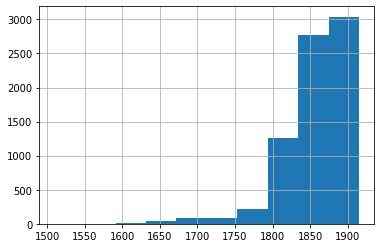

In [ ]:
df["Date of Publication"].hist()

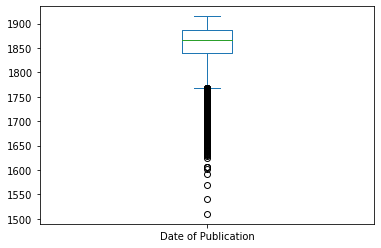

In [ ]:
df["Date of Publication"].plot(kind="box")

In [ ]:
df.head(20)

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
1,216,London; Virtue & Yorston,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
5,481,London,1875.0,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9006.ee.10.
6,519,London,1872.0,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.","ASHLEY, Florence Emily.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12637.e.3.
7,667,"pp. 40. G. Bryan & Co: Oxford, 1898",1800.0,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.","ANDREWS, J. - Writer of Verse",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 011652.g.73.
8,874,London],1676.0,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,"ADAMS, Mary.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11645.bb.42.
9,1143,London,1679.0,NaN,A Satyr against Vertue. (A poem: supposed to b...,"A., T.","OLDHAM, John.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 11602.ee.10.(2.)
10,1280,Coventry,1802.0,Printed by J. Turner,"An Account of the many and great Loans, Benefa...",NaN,"CARTE, Samuel.|JACKSON, Edward - Rector of Sou...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 1430.g.17.


In [ ]:
df["Date of Publication"]=df["Date of Publication"].clip(lower=1775)

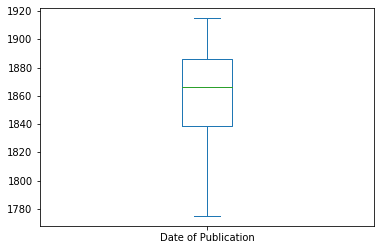

In [ ]:
df["Date of Publication"].plot(kind="box")


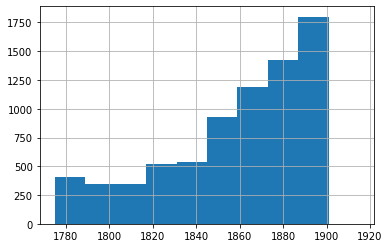

In [ ]:
df["Date of Publication"].hist()